In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

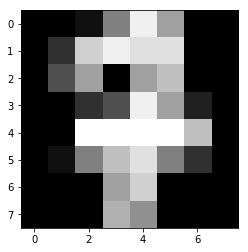

In [4]:
idx = 17
plt.imshow(digits['images'][idx], cmap=plt.cm.gray, interpolation='none')

In [5]:
digits['target'][idx]

7

In [6]:
digits['images'].shape

(1797, 8, 8)

In [7]:
digits['data'].shape

(1797, 64)

In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.


In [9]:
X = digits['data']
y = digits['target']

In [10]:
y = np_utils.to_categorical(y)

In [11]:
y[0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
in_dim = X.shape[1]
out_dim = y.shape[1]

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [15]:
model = Sequential()
model.add(Dense(128, input_shape=(in_dim,)))
model.add(Activation('relu'))
model.add(Dense(out_dim))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train)

Epoch 1/10
1257/1257 [==============================] - 0s - loss: 2.2209 - acc: 0.1782     
Epoch 2/10
1257/1257 [==============================] - 0s - loss: 0.8110 - acc: 0.6412     
Epoch 3/10
1257/1257 [==============================] - 0s - loss: 0.2750 - acc: 0.9069     
Epoch 4/10
1257/1257 [==============================] - 0s - loss: 0.1486 - acc: 0.9523     

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

 32/540 [>.............................] - ETA: 0s

0.96296296296296291

In [18]:
model.predict(X_test[:3])

array([[  7.52212159e-09,   5.05226916e-10,   3.63691370e-08,
          1.25888291e-05,   6.01980896e-11,   1.55768848e-05,
          2.29745808e-07,   5.67394576e-09,   3.31161391e-06,
          2.24194173e-05],
       [  8.91820992e-11,   5.30690547e-10,   8.20487201e-01,
          1.37017793e-07,   6.53727669e-13,   1.07825582e-10,
          2.46845944e-09,   7.84398047e-10,   1.14809939e-06,
          9.38167460e-11],
       [  6.77879512e-01,   2.85704446e-11,   1.08345821e-08,
          2.82524726e-10,   1.54482834e-07,   3.10204314e-07,
          2.54060615e-06,   1.83945531e-07,   1.65687527e-06,
          2.81171168e-07]], dtype=float32)

In [19]:
model.predict(X_test[:3]).argmax(axis=1)

array([9, 2, 0])

In [20]:
y_test[:3].argmax(axis=1)

array([3, 2, 0])

In [21]:
model.save('digits.h5')

In [22]:
from keras.models import load_model
model1 = load_model('digits.h5')

In [23]:
model1.predict(X_test[:3]).argmax(axis=1)

array([9, 2, 0])